In [1]:
import sys
import time
sys.path.insert(0,"../")
import Constants.SI as SI
import eBeam
import eBeam_v02 as eBeam2
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
c = SI.lightSpeed;

In [2]:
#ionization energies
Vi_Ar1 = 15.75962;
Vi_Ar2 = 27.62967
Vi_He1 = 24.58741;
Vi_He2 = 54.41778
Vi_Xe  = 12.13;

In [3]:
# Beam parameters (Facet II)
gamma = 20000; 
beta = np.sqrt(1 - 1/gamma**2); 
en = 5.3e-6; 
beta_s = np.linspace(.05, 1.5, 100);
sigma_z = 10e-6; 
sigma_t = sigma_z / (beta * c); 
Q = 1e-9;

beamParams = {
              'gamma'   : gamma,  
              'sigma_z' : sigma_z, 
              'sigma_t' : sigma_t, 
              'beta'    : beta,
              'charge'  : Q, 
              'emitt'   : en, 
              'beta_s'  : beta_s
             }

eBeam2.get_sigma_r(beamParams)
pPk = eBeam2.peak_charge_dens(beamParams)
r, xi, npoints = eBeam2.get_pos(beamParams, nxi = 2, npoints = 1000);
pos = {'r' : r, 'xi' : xi, 'npoints' : npoints}


In [4]:
Er, rPeak, EPeak = eBeam2.rad_E_field(pos, beamParams, rz = True)

In [5]:
W_Ar1 = eBeam2.ionization_rate(Er, beamParams, Vi_Ar1)

plasma_frac_Ar1, max_frac_Ar1 = \
                eBeam2.ionization_frac(W_Ar1, pos, beamParams)
    
width_Ar1 = eBeam2.neutral_ring_width(plasma_frac_Ar1, pos)

In [6]:
W_Ar2 = eBeam2.ionization_rate(Er, beamParams, Vi_Ar2)

plasma_frac_Ar2, max_frac_Ar2 = \
                eBeam2.ionization_frac(W_Ar2, pos, beamParams)

width_Ar2 = eBeam2.neutral_ring_width(plasma_frac_Ar2, pos)

In [7]:
W_He1 = eBeam2.ionization_rate(Er, beamParams, Vi_He1)


plasma_frac_He1, max_frac_He1 = \
                eBeam2.ionization_frac(W_He1, pos, beamParams)
    
width_He1 = eBeam2.neutral_ring_width(plasma_frac_He1, pos)

In [8]:
W_He2 = eBeam2.ionization_rate(Er, beamParams, Vi_He2)

plasma_frac_He2, max_frac_He2 = \
                eBeam2.ionization_frac(W_He2, pos, beamParams)
    
width_He2 = eBeam2.neutral_ring_width(plasma_frac_He2, pos)

In [ ]:
eBeam2.plot_field(Er, pos, beamParams,'$E_r$ [GV/m]', beta_s, 0)

In [ ]:
eBeam2.plot_field(W_Ar1, pos, beamParams, 'W[fm$^{-1}$]', beta_s, 0, \
                  gas = True, gasName = 'Ar$^{+}$ ')

In [ ]:
eBeam2.plot_field(W_Ar2, pos, beamParams, 'W[fm$^{-1}$]', beta_s, 0, \
                  gas = True, gasName = 'Ar$^{++}$ ')

In [ ]:
eBeam2.plot_field(W_He1, pos, beamParams, 'W[fm$^{-1}$]', beta_s, 0, \
                  gas = True, gasName = 'He$^{+}$ ')

In [ ]:
eBeam2.plot_field(W_He2, pos, beamParams, 'W[fm$^{-1}$]', beta_s, 0, \
                  gas = True, gasName = 'He$^{++}$ ')

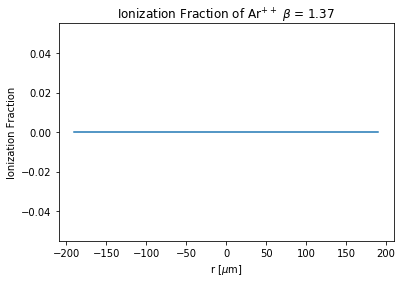

In [14]:
eBeam2.plot_plasma_frac(plasma_frac_Ar2, pos, beamParams, 'Ar$^{++}$', 90)

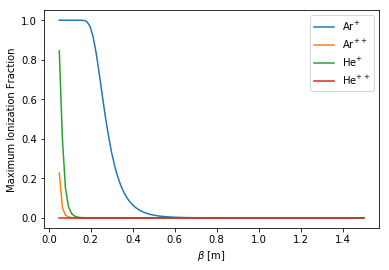

In [9]:
maxes = [max_frac_Ar1, max_frac_Ar2, max_frac_He1, max_frac_He2]
names = ['Ar$^{+}$', 'Ar$^{++}$', 'He$^{+}$', 'He$^{++}$']
widths = [width_Ar1, width_Ar2, width_He1, width_He2]
eBeam2.plot_max_frac(maxes, beamParams, names)

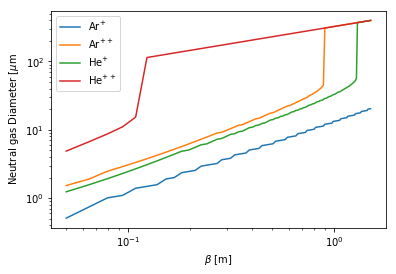

In [11]:
eBeam2.plot_width(widths, names, beamParams, log = True)